**Indication pour tourner le code** : nous avons codé à partir de google colaboratory. Afin de récupérer les CSV, nous sommes passés par une fonction permettant de les récupérer depuis notre propre drive. 
Pour récupérer un CSV, il faut donc télécharger directement le fichier sur "Mydrive" puis run les ligne "#pathData='/content/drive/MyDrive/Confiance_France.xls'", et "'/content/drive/MyDrive/PIB_France.xlsx'" mises en commentaire. 

 ### I. Indicateurs de la confiance en France  

Dans un premier temps, nous souhaitons analyser les corrélations entre la confiance et les agrégats économiques en France. 
Pour ce faire, nous reprenons la base de l'INSEE "Enquête mensuelle de conjoncture auprès des ménages - mai 2021". Le but est alors d'analyser les rapports entre l'indice de confiance et le PIB, ainsi que les rapports entre l'indice de confiance et la consommation des ménages. 
L'indice de confiance de l'INSEE résume leur opinion sur la situation économique : plus sa valeur est élevée, plus le jugement des ménages sur la situation économique est favorable. 


In [ ]:
#Importation des packages nécessaires

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### **La préparation des bases** 

Nous importons ensuite la  base de l'INSEE. 
Nous avions choisi "Enquête mensuelle de conjoncture auprès des ménages - mai 2021" car elle nous permet tout d'abord de disposer d'un indice de confiance. Nous n'avons donc pas besoin, grâce à cette base, de créer un nouvel indice. 
Cet indice de confiance est nécessaire : il regroupe chacune des variables, qui sont très corrélées entre elles. 

De plus, cette base nous offre un temps long, de 1972 à 2021. Ceci permet d'avoir un panorama important, avec des situations économiques différentes. Elle comprend en effet les premiers chocs pétroliers, mais aussi des périodes de rebonds économiques, comme la fin des années 1980. 

Finalement, elle regroupe les principales données lorsque l'on considère la confiance en économie : le chômage, le niveau des prix, la capacité d'épargner, et finalement les situations personelles. 

In [ ]:
#On récupère ainsi la base de données de l'INSEE portant sur la confiance que l'on nomme df


from google.colab import drive
drive.mount('/content/drive')
pathData='/content/drive/MyDrive/Confiance_France.xls'
#pathData='/content/drive/MyDrive/Projet Python économiste/BDD/Confiance_France.xls' #(dépend de l'utilisateur et du chemin pour accéder aux données)
df=pd.read_excel(pathData)

df=df.drop(0)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DATE,Indicateur synthétique,Niveau de vie en France - évolution passée,Niveau de vie en France - perspectives d'évolution,Chômage - perspectives d'évolution,Prix - évolution passée,Prix - perspectives d'évolution,Opportunité de faire des achats importants,Opportunité d'épargner,Capacité d'épargne actuelle,Situation financière personnelle - évolution passée,Situation financière personnelle - perspectives d'évolution,Capacité d'épargne future
1,1972-10-31 00:00:00,127.389597,17.430000,11.980000,1.850000,67.640000,-26.900000,29.350000,-14.280000,13.010000,-3.400000,12.420000,-9.460000
2,1973-01-01 00:00:00,129.882270,22.460000,18.850000,-1.420000,57.630000,-43.930000,22.490000,-5.010000,13.870000,0.360000,14.320000,-10.020000
3,1973-05-01 00:00:00,131.221773,29.030000,15.730000,8.820000,45.690000,-16.110000,29.120000,-10.370000,15.500000,0.160000,15.520000,-11.790000
4,1973-10-01 00:00:00,124.896535,12.130000,3.640000,1.630000,79.490000,-18.100000,30.460000,-21.780000,11.820000,-4.960000,11.710000,-14.510000
5,1974-01-01 00:00:00,113.666611,2.470000,-31.130000,47.210000,82.260000,12.770000,34.790000,-30.090000,10.030000,-9.450000,-6.850000,-23.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2021-01-01 00:00:00,92.384351,-69.506594,-48.771287,74.092425,-38.583560,-27.081447,-18.116690,38.747954,25.721759,-16.461267,-8.741883,8.341604
453,2021-02-01 00:00:00,91.620596,-72.257328,-53.400699,72.698767,-36.916415,-28.052070,-16.931384,38.856441,25.566420,-15.880510,-8.348855,10.675755
454,2021-03-01 00:00:00,94.534382,-75.116855,-35.888744,64.645562,-35.772065,-23.463521,-14.254832,41.581539,25.058379,-15.013993,-4.237944,9.677773
455,2021-04-01 00:00:00,94.670068,-74.686982,-35.506587,62.258623,-35.348256,-21.015759,-12.278958,43.505421,25.348572,-13.324107,-7.138498,11.259220


Le but final de ce code est de réaliser des régressions linéaires entre les données d'une nouvelle base (base du PIB français et de la consommation des ménages) et les données de cette base de l'INSEE, portant sur la confiance. 
Or, afin de merger les données du PIB (et de la consommation des ménages) sur cette base de l'INSEE, il faut avoir une temporalité similaire. La temporalité de la base du PIB est annuelle. 
De plus, nous souhaitons avoir avant tout des tendances de long terme, ce qui convient donc à un niveau annuel. 
Nous choisisons donc tout d'abord de modifier le format des dates pour ne retenir que l'année, puis de faire une moyenne annuelle pour chaque indicateur (indicateur synthétique de confiance, niveau de vie en France ...) à partir de ces données.

In [ ]:
#On remplace les dates par l'année, afin de merger avec la table de données sur le PIB 

df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)
df['Année'] = pd.DatetimeIndex(df['DATE']).year
df=df.drop(['DATE'], axis=1)
display(df)

,Indicateur synthétique,Niveau de vie en France - évolution passée,Niveau de vie en France - perspectives d'évolution,Chômage - perspectives d'évolution,Prix - évolution passée,Prix - perspectives d'évolution,Opportunité de faire des achats importants,Opportunité d'épargner,Capacité d'épargne actuelle,Situation financière personnelle - évolution passée,Situation financière personnelle - perspectives d'évolution,Capacité d'épargne future,Année
1,127.389597,17.430000,11.980000,1.850000,67.640000,-26.900000,29.350000,-14.280000,13.010000,-3.400000,12.420000,-9.460000,1972
2,129.882270,22.460000,18.850000,-1.420000,57.630000,-43.930000,22.490000,-5.010000,13.870000,0.360000,14.320000,-10.020000,1973
3,131.221773,29.030000,15.730000,8.820000,45.690000,-16.110000,29.120000,-10.370000,15.500000,0.160000,15.520000,-11.790000,1973
4,124.896535,12.130000,3.640000,1.630000,79.490000,-18.100000,30.460000,-21.780000,11.820000,-4.960000,11.710000,-14.510000,1973
5,113.666611,2.470000,-31.130000,47.210000,82.260000,12.770000,34.790000,-30.090000,10.030000,-9.450000,-6.850000,-23.770000,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,92.384351,-69.506594,-48.771287,74.092425,-38.583560,-27.081447,-18.116690,38.747954,25.721759,-16.461267,-8.741883,8.341604,2021
453,91.620596,-72.257328,-53.400699,72.698767,-36.916415,-28.052070,-16.931384,38.856441,25.566420,-15.880510,-8.348855,10.675755,2021
454,94.534382,-75.116855,-35.888744,64.645562,-35.772065,-23.463521,-14.254832,41.581539,25.058379,-15.013993,-4.237944,9.677773,2021
455,94.670068,-74.686982,-35.506587,62.258623,-35.348256,-21.015759,-12.278958,43.505421,25.348572,-13.324107,-7.138498,11.259220,2021


In [ ]:
#On reset l'index, et puis on groupe les valeurs par année, en prenant la moyenne des indicateurs sur l'année 
df= df.reset_index(drop=True)
df=df.astype(float)
df=df.groupby(['Année']).mean()
display(df)

,Indicateur synthétique,Niveau de vie en France - évolution passée,Niveau de vie en France - perspectives d'évolution,Chômage - perspectives d'évolution,Prix - évolution passée,Prix - perspectives d'évolution,Opportunité de faire des achats importants,Opportunité d'épargner,Capacité d'épargne actuelle,Situation financière personnelle - évolution passée,Situation financière personnelle - perspectives d'évolution,Capacité d'épargne future
Année,,,,,,,,,,,,
1972.0,127.389597,17.430000,11.980000,1.850000,67.640000,-26.900000,29.350000,-14.280000,13.010000,-3.400000,12.420000,-9.460000
1973.0,128.666859,21.206667,12.740000,3.010000,60.936667,-26.046667,27.356667,-12.386667,13.730000,-1.480000,13.850000,-12.106667
1974.0,112.444724,-10.570000,-19.646667,40.850000,91.816667,-14.976667,30.086667,-31.200000,9.446667,-12.590000,-3.320000,-22.220000
1975.0,114.713987,-13.153333,-7.893333,39.780000,66.453333,-40.070000,21.683333,-21.556667,11.896667,-10.686667,4.116667,-17.806667
1976.0,118.402677,-5.396667,-4.610000,10.343333,64.393333,-31.526667,27.890000,-25.896667,11.466667,-8.760000,6.400000,-16.480000
1977.0,114.932364,-11.500000,-8.343333,21.796667,62.793333,-35.466667,21.506667,-23.093333,11.353333,-11.086667,2.633333,-16.050000
1978.0,118.040310,-3.396667,-3.766667,23.503333,37.773333,-19.083333,22.886667,-18.300000,12.700000,-8.206667,4.266667,-14.416667
1979.0,111.934394,-15.206667,-18.383333,44.813333,51.890000,-15.763333,23.630000,-19.556667,12.003333,-11.133333,-1.563333,-15.780000
1980.0,106.359215,-29.320000,-29.933333,48.533333,69.756667,-10.496667,26.590000,-31.843333,8.806667,-15.006667,-5.510000,-18.670000


Pour avoir une idée du type de données qui sont à notre disposition, nous réalisons quelques statistiques descriptives. 

In [ ]:
display(df.describe())

,Indicateur synthétique,Niveau de vie en France - évolution passée,Niveau de vie en France - perspectives d'évolution,Chômage - perspectives d'évolution,Prix - évolution passée,Prix - perspectives d'évolution,Opportunité de faire des achats importants,Opportunité d'épargner,Capacité d'épargne actuelle,Situation financière personnelle - évolution passée,Situation financière personnelle - perspectives d'évolution,Capacité d'épargne future
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,103.429932,-37.683233,-22.409366,34.071623,1.728843,-29.935935,-3.906386,5.438708,9.288014,-18.417396,-4.141327,-10.579319
std,10.771774,24.399645,16.736957,22.837441,41.300093,10.236784,18.765441,20.819416,4.858060,7.436589,8.535063,6.980757
min,83.789495,-75.507594,-55.495863,-30.528160,-52.419654,-51.140071,-32.246143,-35.093333,0.043333,-33.422157,-23.101589,-23.450000
25%,96.363509,-53.700613,-31.686988,13.402771,-31.429378,-36.696550,-19.767122,-13.806667,5.779396,-24.044197,-8.459288,-15.741250
50%,102.235275,-40.504167,-24.642539,36.232405,-9.247573,-30.811051,-8.993753,10.607479,9.142643,-18.522848,-3.015030,-10.797016
75%,110.754728,-21.397917,-8.789604,52.983722,31.874043,-20.121929,10.799812,20.071505,11.883160,-12.873759,2.575257,-6.791667
max,128.666859,21.206667,12.740000,70.376876,91.816667,-10.496667,30.086667,40.690867,26.166784,-1.480000,13.850000,10.791881


*Nous avons 50 observations, c'est-à-dire une période de 50 années.*
*En regardant la moyenne des données et leur minimum, on peut s'apercevoir que ces données représentent des niveaux d'évolution. En moyenne, par exemple, le solde d'opinion des ménages sur l'évolution passée de leur niveau de vie a perdu 37 points entre deux années. Au plus bas niveau, le solde d'opinion sur le niveau de vie a diminué de 75 points.*
*Des valeurs négatives indiquent donc une baisse du solde (ou de points pour l'indicateur synthétique), alors que les valeurs positives indiquent une hausse.*

On récupère ensuite la base contenant les données du PIB et la consommation des ménages. 
Cette base de données, de l'INSEE, "Évolution du produit intérieur brut et de ses composantes", nous donne les données françaises exprimées en pourcentage. 
Nous pouvons donc comparer les données de notre première base de données avec cette nouvelle base de données, elle aussi exprimant des évolutions.


Cette base a été choisie simplement pour son caractére descriptif (le PIB + la consommation des ménages). Elle est annuelle. 


In [ ]:
#On récupère l'excel_PIB pour faire une régression que l'on nomme df2

#df1 = pd.read_excel('/Users/acoss/OneDrive/Bureau/Eco_PIB_France_xls/econ-gen-pib-composante_evolution.xlsx')
from google.colab import drive
drive.mount('/content/drive')

pathData='/content/drive/MyDrive/PIB_France.xlsx'
#pathData='/content/drive/MyDrive/Projet Python économiste/BDD/PIB_France.xlsx'

df1=pd.read_excel(pathData)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La base "Évolution du produit intérieur brut et de ses composantes" contient différents agrégats économiques. Il existe également comme donnée "la formation brute de capitale fixe" ou "exportations de biens et services", mais, au vue de notre ancienne base, nous avons décidé de s'arrêter uniquement sur les données en lien avec les ménages français. 
La base est par la suite transposée pour qu'elle puisse être mergée à notre base sur la confiance des ménages

In [ ]:
#On enlève les colonnes qui ne nous servent pas
df1 = df1.iloc[[2,4,7]]
df1 = df1.reset_index(drop = True)
#On transpose notre base de données pour qu'elle soit dans le même format que la première base de données, et on reset l'indexe
df1 = df1.T
df1 = df1.reset_index(drop = True)
df1.columns = ['Année' ,'PIB' ,'Consommation']
df1

,Année,PIB,Consommation
0,Indicateur,Produit intérieur brut (PIB),Dépense de consommation finale
1,1950,8.56562,6.71896
2,1951,5.79152,6.95405
3,1952,3.11403,4.94516
4,1953,3.45623,4.57559
...,...,...,...
67,2016,1.09546,1.66601
68,2017,2.29141,1.44193
69,2018 (r),1.8651,0.926525
70,2019 (r),1.84297,1.53918


La base est par la suite mise en forme pour que l'axe des années remplace celui de des indices. 
De plus, un (r) succède à 2018 et 2019, nous l'enlevons donc. 

In [ ]:
df1['Année'].iloc[-2]=2019.0
df1['Année'].iloc[-3]=2018.0
df1.index = df1['Année']
df1=df1.drop('Année', axis=1)
df1

,PIB,Consommation
Année,,
Indicateur,Produit intérieur brut (PIB),Dépense de consommation finale
1950.0,8.56562,6.71896
1951.0,5.79152,6.95405
1952.0,3.11403,4.94516
1953.0,3.45623,4.57559
...,...,...
2016.0,1.09546,1.66601
2017.0,2.29141,1.44193
2018.0,1.8651,0.926525


Les deux bases sont donc enfin prêtes pour ne former plus qu'une seule base. 
La concaténation permet donc de n'avoir plus qu'une seule base, et réaliser les régressions linéaires souhaitées. 

In [ ]:
#Concaténaton de df1 et df afin de faire des graphiques et la régression

d = [df,df1]
Data = pd.concat(d, join='inner', axis=1)
Data

,Indicateur synthétique,Niveau de vie en France - évolution passée,Niveau de vie en France - perspectives d'évolution,Chômage - perspectives d'évolution,Prix - évolution passée,Prix - perspectives d'évolution,Opportunité de faire des achats importants,Opportunité d'épargner,Capacité d'épargne actuelle,Situation financière personnelle - évolution passée,Situation financière personnelle - perspectives d'évolution,Capacité d'épargne future,PIB,Consommation
Année,,,,,,,,,,,,,,
1972.0,127.389597,17.430000,11.980000,1.850000,67.640000,-26.900000,29.350000,-14.280000,13.010000,-3.400000,12.420000,-9.460000,4.51137,4.95766
1973.0,128.666859,21.206667,12.740000,3.010000,60.936667,-26.046667,27.356667,-12.386667,13.730000,-1.480000,13.850000,-12.106667,6.34456,5.84219
1974.0,112.444724,-10.570000,-19.646667,40.850000,91.816667,-14.976667,30.086667,-31.200000,9.446667,-12.590000,-3.320000,-22.220000,4.30084,3.28457
1975.0,114.713987,-13.153333,-7.893333,39.780000,66.453333,-40.070000,21.683333,-21.556667,11.896667,-10.686667,4.116667,-17.806667,-0.959867,2.86176
1976.0,118.402677,-5.396667,-4.610000,10.343333,64.393333,-31.526667,27.890000,-25.896667,11.466667,-8.760000,6.400000,-16.480000,4.35676,5.08292
1977.0,114.932364,-11.500000,-8.343333,21.796667,62.793333,-35.466667,21.506667,-23.093333,11.353333,-11.086667,2.633333,-16.050000,3.46429,2.71196
1978.0,118.040310,-3.396667,-3.766667,23.503333,37.773333,-19.083333,22.886667,-18.300000,12.700000,-8.206667,4.266667,-14.416667,3.97855,4.5716
1979.0,111.934394,-15.206667,-18.383333,44.813333,51.890000,-15.763333,23.630000,-19.556667,12.003333,-11.133333,-1.563333,-15.780000,3.55,3.38637
1980.0,106.359215,-29.320000,-29.933333,48.533333,69.756667,-10.496667,26.590000,-31.843333,8.806667,-15.006667,-5.510000,-18.670000,1.5788,1.72524




---
## **Les régressions linéaires**


Nous souhaitons tout d'abord avoir une vue d'ensemble de l'évolution du PIB et celle de l'indice de confiance. L'indicateur synthètique représente cette indice de confiance. 
Nous réalisons donc un graphe pour voir globalement si les évolutions semblent conjointes. 

Text(0.5, 1.0, "Évolution de l'indicateur synthétique de confiance au cours du temps")

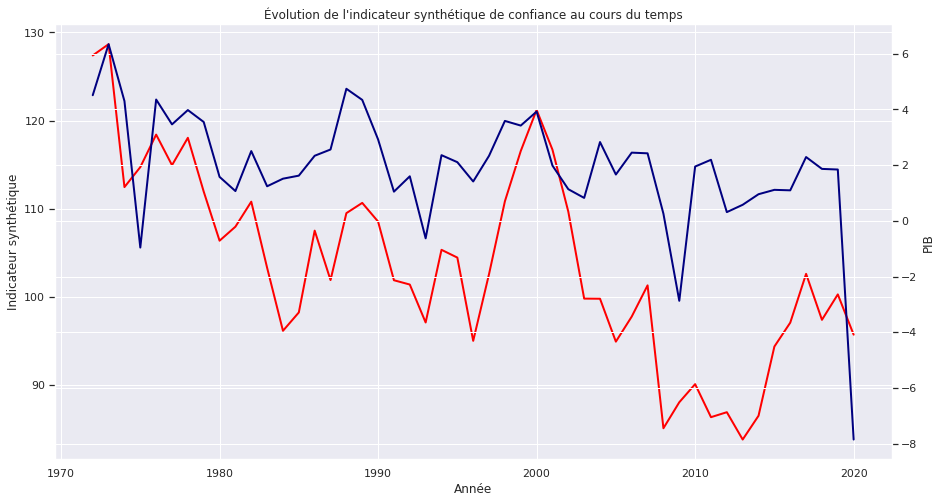

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=Data, x=Data.index, y='Indicateur synthétique', color="red", linewidth=2)
ax2=plt.twinx()
sns.lineplot(data=Data, x=Data.index, y='PIB', color="navy", linewidth=2, ax=ax2)
plt.title("Évolution de l'indicateur synthétique de confiance au cours du temps")

Nous pouvons ainsi attester que les évolutions semblent conjointes. Il est rare qu'une valeur augmente, sans qu'une autre n'augmente pas. 


# *A. Régression linéaire du PIB sur l'indicateur de confiance.*

Nous réalisons tout d'abord la régression linéaire du PIB sur l'indicateur de confiance, appelé "indicateur synthétique" dans notre base. 
La sortie du code nous donne alors toutes les informations nécessaires sur le coefficient de corrélations. 
Cette sortie est alors davantage commentée dans le rapport joint. 

In [ ]:
#On effectue la régression par la méthode des moindes carrés (OLS)

import statsmodels.api as sm

X = Data['Indicateur synthétique'].values
Y = Data['PIB'].values
X = X.astype(float)
Y = Y.astype(float)

x = sm.add_constant(X)
model = sm.OLS(Y, x)

results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de Stata
print(results.summary())

#Le coefficient est positif, ce qui semble coherent, et on a un coefficient significatif à moins de 1%. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     24.12
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           1.14e-05
Time:                        14:20:02   Log-Likelihood:                -96.319
No. Observations:                  49   AIC:                             196.6
Df Residuals:                      47   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0773      2.456     -4.102      0.0

Text(0.5, 1.0, "Régression linéaire du PIB nominal français sur l'indicateur synthétique de confiance")

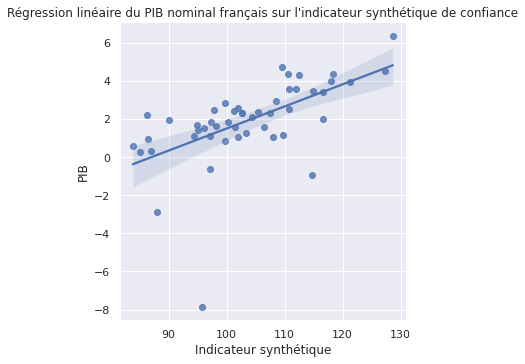

In [ ]:
#On effectue un graphe avec Seaborn qui permet d'afficher la droite de régression sur le jeu de données.

Data = Data.astype(float)
sns.set(rc = {'figure.figsize':(15,8)})
sns.lmplot(x='Indicateur synthétique', y='PIB', data = Data)
plt.title("Régression linéaire du PIB nominal français sur l'indicateur synthétique de confiance")

# *B. Régression linéaire de la consommation des ménages sur l'indicateur de confiance*

On fait une seconde régression sur la dépense de consommation des ménages pour voir si la corrélation entre PIB et confiance est moins sensible que la corrélation entre confiance et dépense des ménages (cf théorie keynesienne). 

In [ ]:
X = Data['Indicateur synthétique'].values
Y = Data['Consommation'].values
X = X.astype(int)
Y = Y.astype(int)

x = sm.add_constant(X)
model = sm.OLS(Y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     48.53
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           9.18e-09
Time:                        14:20:03   Log-Likelihood:                -74.523
No. Observations:                  49   AIC:                             153.0
Df Residuals:                      47   BIC:                             156.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3415      1.572     -5.943      0.0

*On obtient un R² supérieur, ce qui indique une meilleure corrélation entre Consommation et indicateur de confiance, qu'entre PIB et indicateur de confiance.*

*Cela peut laisser à penser que, conformément à la théorie de Keynes, la confiance des ménages en l'avenir, leurs anticipations de la situation future, est une cause déterminante de l'évolution du PIB par le biais de la propension des ménages à dépenser (évidemment, nous n'avons pas ici tous les outils en main pour l'affirmer de manière définitive).*



---



## **Création de l'ACP (pour former un nouvel indicateur)**




---



Tout d'abord, nous reprenons la base de données formée des différents facteurs ayant servi à l'INSEE pour produire son indicateur synthétique, cad son indicateur de confiance. 

Pour réaliser une ACP, il nous faut un même nombre de colonnes et de lignes. 
Pour ce faire, on ne réalise qu'une ACP sur les 10 dernières années. 

Ces 10 dernières années sont assez révélatrices des changements en France. En effet : 
Les années 2011-2014 sont encore empreinte de la crise des subprimes, la confiance est toujours assez basse, avec une difficile reprise du PIB. 
De 2014 à 2020, la reprise économique semble possible, la confiance regagne les Français. 
La crise du Covid touche 2020 et 2021, avec une baisse du PIB et de la confiance. 



# **I. ACP des observations (années)**

### *A. Préparation de notre table de donnée*

In [ ]:
indexNames = df[df.index < 2011.0].index #on crée indexNames comprenant toutes les lignes des données inférieures à 2011
df=df.drop(indexNames, axis=0) #on supprime ces lignes-ci 
del df['Indicateur synthétique'] #on supprime également la colonne "indicateur synthétique", qui est l'indicateur de confiance fourni par l'INSEE. On effet,
#le but de notre code est de créer un nouvel indicateur (en fonction des différents facteurs de la confiance)
df



,Niveau de vie en France - évolution passée,Niveau de vie en France - perspectives d'évolution,Chômage - perspectives d'évolution,Prix - évolution passée,Prix - perspectives d'évolution,Opportunité de faire des achats importants,Opportunité d'épargner,Capacité d'épargne actuelle,Situation financière personnelle - évolution passée,Situation financière personnelle - perspectives d'évolution,Capacité d'épargne future
Année,,,,,,,,,,,
2011.0,-70.579781,-51.305908,43.080459,28.076171,-13.151341,-22.736422,16.342302,5.426625,-30.083016,-21.759334,-9.800681
2012.0,-70.363362,-46.825461,62.172054,8.754214,-19.588128,-25.713764,27.439179,13.055946,-29.098833,-21.033942,-3.715791
2013.0,-73.949438,-55.495863,63.877017,-8.362564,-19.510558,-30.054099,28.964862,15.054486,-32.299473,-23.101589,-2.467944
2014.0,-70.052155,-48.197159,60.883332,-30.047630,-29.962455,-26.002965,19.940140,15.030053,-32.135830,-19.616015,-1.482731
2015.0,-57.411829,-33.703145,52.502185,-51.643653,-41.076059,-12.945872,8.135942,11.088904,-26.488901,-11.670752,-4.446886
2016.0,-53.377450,-30.297311,32.347608,-52.419654,-36.686201,-7.807110,-1.061638,7.872815,-24.057115,-9.622667,-8.101103
2017.0,-42.402839,-18.043483,12.285230,-50.143712,-30.020416,-4.083467,4.222216,11.505113,-19.212630,-8.554606,-2.711988
2018.0,-45.469473,-30.046904,13.234250,-25.716645,-19.207670,-9.311992,5.486877,10.353702,-26.579798,-14.680159,-8.135402
2019.0,-46.195034,-25.534536,12.534110,-25.772463,-23.707061,-11.337137,8.110368,11.838622,-21.782310,-6.567752,-3.151563


On crée une nouvelle base X, à partir de df 

In [ ]:
X = df

On vérifie ensuite le nombre de nos observations (n) et le nombre de nos facteurs (p) 

In [ ]:
n,p = X.shape
print(n)
print(p)

11
11


# *B. Préparation de l'ACP* 


On s'occupe tout d'abord de centrer et de réduire les variables (indispensable lors d'une ACP). 
Pour ce faire, on instancie l'objet. 

L'instanciation permet de créer des objets à partir d'une classe. 
Ici notre classe est StandardScaler. 
On peut créer alors notre nouvel objet Z, à partir de cette classe StandardScaler. Grâce à ça, Z est normalisée. On transforme donc X à partir de StandardScaler, c'est-à-dire grâce à la création d'un nouvel objet qui sera avec des variables centrées et réduites. 


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

Z = sc.fit_transform(X)

print(Z)

[[-9.41771195e-01 -1.05820986e+00  1.63275456e-03  2.18258935e+00
   1.45501161e+00 -6.96351470e-01  1.36152583e-02 -1.44602293e+00
  -8.83822803e-01 -1.29173443e+00 -1.27638961e+00]
 [-9.23080297e-01 -6.72892480e-01  9.23302953e-01  1.39037069e+00
   6.61560984e-01 -1.05700701e+00  9.33174228e-01 -8.01955550e-02
  -7.26962561e-01 -1.17332211e+00 -1.96778686e-01]
 [-1.23278998e+00 -1.41854507e+00  1.00561210e+00  6.88566505e-01
   6.71122838e-01 -1.58276665e+00  1.05960217e+00  2.77589986e-01
  -1.23708424e+00 -1.51084276e+00  2.46204561e-02]
 [-8.96203062e-01 -7.90858213e-01  8.61088284e-01 -2.00541854e-01
  -6.17262823e-01 -1.09203902e+00  3.11755378e-01  2.73216035e-01
  -1.21100258e+00 -9.41861132e-01  1.99421620e-01]
 [ 1.95472652e-01  4.55623783e-01  4.56478143e-01 -1.08599935e+00
  -1.98721588e+00  4.89611116e-01 -6.66416733e-01 -4.32342179e-01
  -3.10988774e-01  3.55115359e-01 -3.26493084e-01]
 [ 5.43899821e-01  7.48524800e-01 -5.16508791e-01 -1.11781616e+00
  -1.44608631e+00  

On vérifie ici simplement nos nouvelles données. Il faut qu'elles correspondent à des variables centrées réduites. 

In [ ]:
print(np.mean(Z,axis=0))
#on vérifie ici que nos moyennes sont nulles, ce qui est le cas. 

[ 7.46877307e-16  7.19121732e-17 -1.00929366e-16 -3.02788098e-17
  1.71579922e-16 -1.00929366e-17 -4.03717464e-17 -4.03717464e-17
 -3.02788098e-16  5.04646829e-16  4.03717464e-17]


In [ ]:
print(np.std(Z,axis=0,ddof=0))
#on vérifie ici que les écarts types sont bien égaux à 1. 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# *C. Mise en oeuvre de l'ACP*

On importe une nouvelle classe PCA. Grâce à l'instanciation, on peut désormais créer un nouvel objet via cette classe, acp. acp a donc des paramètres selon ACP. 

In [ ]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')

On crée une variable "coord". Celle-ci correspond alors aux cordonnées factorielles de Z, que l'on obtient grâce à la fonction fit_transform. 

Les coordonnées factorielles sont simplement définies comme les coordonnées de notre variable selon nos deux nouveaux axes. Ceci représente donc la corrélation entre une variable et les axes factoriels. 

In [ ]:
coord = acp.fit_transform(Z)

In [ ]:
print(acp.n_components_)
#on vérifie que l'on a bien 11 composantes, c'est-à-dire p composantes (le nombre de facteurs)

11


Pour trouver les valeurs propres de notre nouvelle matrice, on utilise explained_variance, en corrigeant ces valeurs par n-1/n 

In [ ]:
eigval = (n-1)/n*acp.explained_variance_ 
print(eigval)

[5.67010826e+00 3.42809171e+00 1.25524814e+00 3.00797420e-01
 2.14015869e-01 6.30574058e-02 4.46318826e-02 1.78597765e-02
 4.14413600e-03 2.04540120e-03 1.31906614e-34]


On peut alors réaliser un "trace d'éboulis de valeurs propres", cad représenter les valeurs propres des facteurs de notre ACP. 

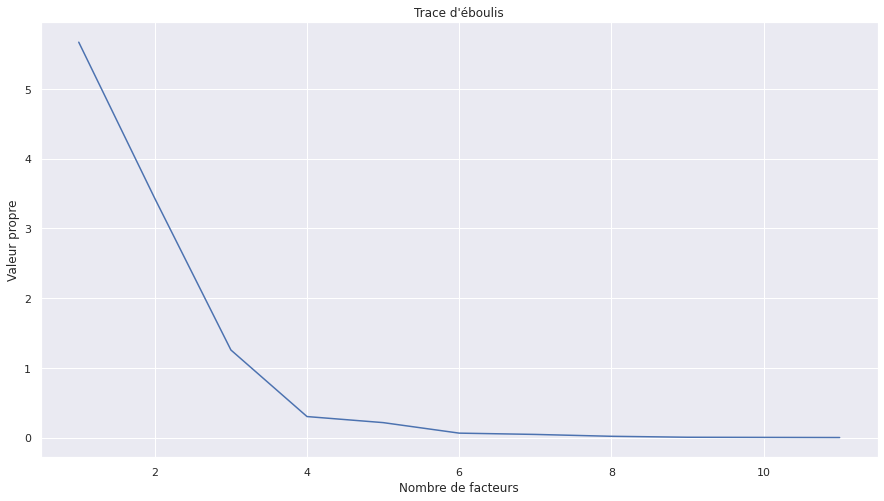

In [ ]:

plt.plot(np.arange(1,p+1),eigval) 
plt.title("Trace d'éboulis") 
plt.ylabel("Valeur propre") 
plt.xlabel("Nombre de facteurs") 
plt.show()

On s'assure que l'on a un ratio de 1 grâce au graphique de la variance expliquée selon le nombre de facteurs. 

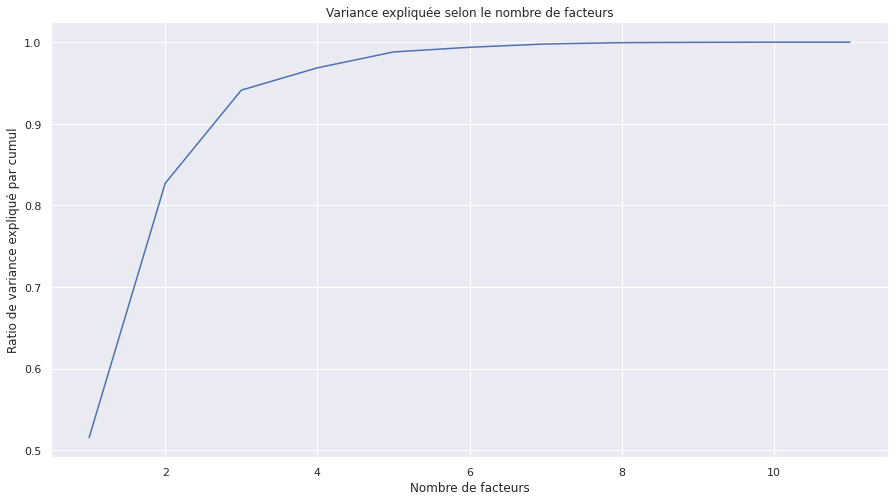

In [ ]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_)) 
plt.title("Variance expliquée selon le nombre de facteurs")
plt.ylabel("Ratio de variance expliqué par cumul")
plt.xlabel("Nombre de facteurs")
plt.show()
#ici on voit bien que le ratio est égal à 1 lorsqu'on a le nombre maximum de facteurs. 

Pour interpréter l'ACP, on réalise le test des "bâtons brisés". On compare de ce fait la valeur des valeurs propres des facteurs à un certain seuil, ici calculé "S". Si la valeur propre est supérieure au seuil, le facteur est valide. 

In [ ]:
S = 1/np.arange(p,0,-1) 
S = np.cumsum(S)
S = S[::-1]

In [ ]:
Val_factors=[eigval[k]>=S[k] for k in range(len(S))]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':S,'Validité du facteur':Val_factors}))

      Val.Propre    Seuils  Validité du facteur
0   5.670108e+00  3.019877                 True
1   3.428092e+00  2.019877                 True
2   1.255248e+00  1.519877                False
3   3.007974e-01  1.186544                False
4   2.140159e-01  0.936544                False
5   6.305741e-02  0.736544                False
6   4.463188e-02  0.569877                False
7   1.785978e-02  0.427020                False
8   4.144136e-03  0.302020                False
9   2.045401e-03  0.190909                False
10  1.319066e-34  0.090909                False


Les deux premiers facteurs sont donc valides. 
Ceci confirme également ce qu'on aurait pu deviner grâce aux nombres de cassures de notre première figure. 

On avait une "cassure" à partir du deuxième facteur. Le nombre de facteur à retenir est donc de 2. 



# *D. Représentation des observations (années) selon deux axes.*

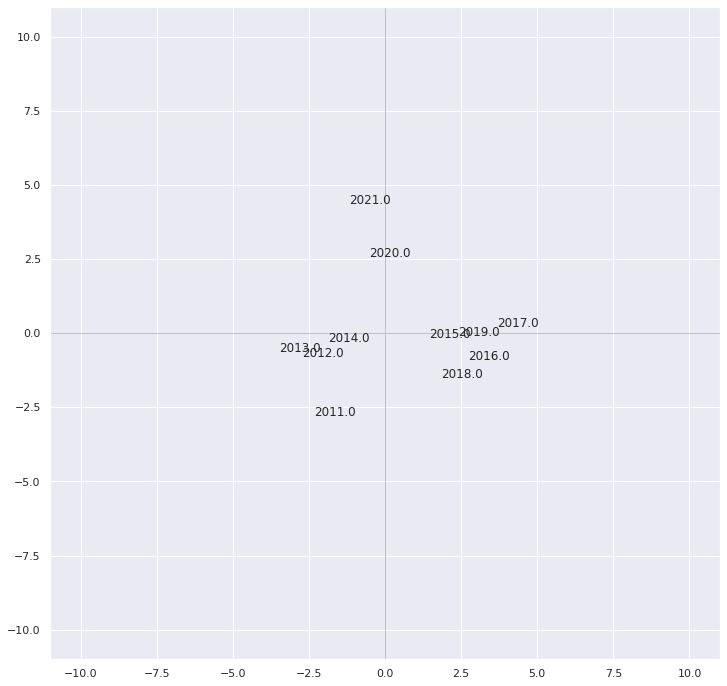

In [ ]:
#positionnement des observations(=années) dans le premier plan
fig, axes = plt.subplots(figsize=(12,12)) #choix de la taille du graphique 
axes.set_xlim(-11,11) #même limites en abscisse. On choisit cette limite selon le nombre d'observations. 
axes.set_ylim(-11,11) #et en ordonnée
#placement des observations dans le plan 
for i in range(n): 
  plt.annotate(X.index[i],(coord[i,0],coord[i,1])) #on place selon leurs coordonnées calculées précédemment. 
#on définit les axes. 
plt.plot([-11,11],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-11,11],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

La dispersion de nos observations semblent être logiques :  les années de faible confiance (2021 et 2020) sont presque orthogonales avec les années de forte confiance (entre 2015 et 2019). 
On retrouve, selon le premier axe, des années avec une confiance mitigée, entre 2011 et 2014. 

# *E. Calcul de la contribution des observations aux deux axes*

On calcule le carré de la distance à l'origine de point. Ceci correspond à la contribution des observations dans l'inertie totale. 
On regarde plus exactement la dispersion des observations (années) par rapport à l'origine. 

In [ ]:
 #contribution des années dans l'inertie totale
di = np.sum(Z**2,axis=1) #on calcule la distance par rapport à l'origine 
print(pd.DataFrame({'ID':X.index,'d_i':di})) #on affiche la distance de chaque observation

        ID        d_i
0   2011.0  15.542463
1   2012.0   8.466534
2   2013.0  12.986419
3   2014.0   6.349126
4   2015.0   6.782765
5   2016.0  10.188951
6   2017.0  14.138345
7   2018.0   7.726161
8   2019.0   7.508914
9   2020.0   9.885413
10  2021.0  21.424908


A la suite de cette sortie, on peut analyser que les années "2011", "2013", "2017" et "2021" sont les deux années qui ont le plus contribué à l'inertie totale. On les retrouve aux extrémités du premier axe.  

On peut alors calculer le cosinus carré, c'est-à-dire la qualité de la représentation. 

In [ ]:
cos2 = coord**2 #on prend la coordonnée au carré 
for j in range(p): #p représente le nombre de facteurs 
  cos2[:,j] = cos2[:,j]/di #pour chaque observation, on divise ses coordonnées au carré (par exemple, toutes les lignes de la jième colonne) par le carré des distances à l'origine des observations. 
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})) #on observe alors selon le premier et le deuxième axe 

        id    COS2_1    COS2_2
0   2011.0  0.347799  0.505021
1   2012.0  0.875424  0.075802
2   2013.0  0.929132  0.030286
3   2014.0  0.544819  0.013376
4   2015.0  0.309547  0.003159
5   2016.0  0.733111  0.077145
6   2017.0  0.962300  0.003261
7   2018.0  0.444008  0.296510
8   2019.0  0.759923  0.000787
9   2020.0  0.028813  0.671790
10  2021.0  0.066859  0.884412


On vérifie la théorie - cad que la somme en ligne des cosinus carré est égale à 1 

In [ ]:
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Désormais, on peut calculer la contribution des observations aux axes. Grâce à ça, on peut déterminer quelles observations contribuent davantage à la définition de chaque facteur. 

In [ ]:

ctr = coord**2 # on prend les coordonnées au carré 
for j in range(p): #p représente le nombre de facteurs
  ctr[:,j] = ctr[:,j]/(n*eigval[j]) #pour chaque observation, on divise les coordonnées au carré des observations (toutes les lignes de la jième colonne) par n x la valeur propre de l'observation. 
  print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})) #on peut alors observer selon le premier et le deuxième axe. 

        id     CTR_1      CTR_2
0   2011.0  0.086669   7.849276
1   2012.0  0.118834   0.641780
2   2013.0  0.193456   0.393301
3   2014.0  0.055460   0.084923
4   2015.0  0.033663   0.021425
5   2016.0  0.119761   0.786027
6   2017.0  0.218135   0.046110
7   2018.0  0.055001   2.290881
8   2019.0  0.091488   0.005909
9   2020.0  0.004567   6.640924
10  2021.0  0.022967  18.948452
        id     CTR_1     CTR_2
0   2011.0  0.086669  0.208154
1   2012.0  0.118834  0.017019
2   2013.0  0.193456  0.010430
3   2014.0  0.055460  0.002252
4   2015.0  0.033663  0.000568
5   2016.0  0.119761  0.020845
6   2017.0  0.218135  0.001223
7   2018.0  0.055001  0.060752
8   2019.0  0.091488  0.000157
9   2020.0  0.004567  0.176110
10  2021.0  0.022967  0.502491
        id     CTR_1     CTR_2
0   2011.0  0.086669  0.208154
1   2012.0  0.118834  0.017019
2   2013.0  0.193456  0.010430
3   2014.0  0.055460  0.002252
4   2015.0  0.033663  0.000568
5   2016.0  0.119761  0.020845
6   2017.0  0.218135  0.001

On a donc 2017, 2012, 2013, 2016 qui sont déterminants pour le premier axe. 
Pour le second, nous avons surtout 2011, 2020 et 2021. 


In [ ]:
#vérifions la théorie
print(np.sum(ctr,axis=0))
#théorie vérifiée, la somme est bien égale à 1. 


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# **II. Représentation des facteurs de la confiance**


# *A. Préparation des variables*

On calcule les vecteurs propres pour ensuite réaliser l'ACP des facteurs. En effet, il faut désormais calculer la matrice des corrélations entre les variables (observations) et les facteurs. 

In [ ]:
print(acp.components_) #components permet le calcul des vecteurs propres
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval) 


[[ 3.85750377e-01  3.97976521e-01 -3.46361613e-01 -2.99693771e-01
  -2.33094205e-01  3.99381811e-01 -3.39600567e-01 -1.24961525e-01
   1.78128337e-01  3.13172004e-01 -9.18669516e-02]
 [-3.56682764e-02  8.45241337e-03  1.82382355e-01 -2.49325249e-01
  -3.70978260e-02  3.95255811e-02  2.80943039e-01  5.04228383e-01
   4.28312844e-01  3.33613003e-01  5.21887561e-01]
 [-2.14981201e-01 -3.87700785e-02  3.63754498e-01 -4.21163422e-01
  -7.32757793e-01 -6.09391451e-02 -7.17523514e-02 -2.95425214e-02
  -2.97415354e-01 -8.23785284e-02 -2.59454070e-02]
 [ 4.33748600e-01 -5.19101358e-01  1.37148987e-01 -2.40227944e-01
   8.31138197e-02 -4.16548156e-01 -4.57793382e-01  3.68929630e-02
   2.60215141e-01 -1.33289019e-02 -8.14303368e-02]
 [-3.37757645e-01 -1.91852687e-01  3.21959441e-01  3.30827647e-01
  -1.42726564e-01  1.95001788e-01 -1.15140021e-01 -4.01865041e-01
   4.89807992e-01  3.60531057e-01 -1.81559050e-01]
 [ 1.69831369e-01  2.40201938e-01 -1.14607502e-01  4.09325699e-01
  -2.94049572e-01 -

In [ ]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p)) #on crée une matrice pxp (nombre de facteurs de confiance), formée avec des 0 
for k in range(p):
  corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k] #à la ième ligne, on rajoute pour chaque colonne (allant de 1 à p) la valeur propre liée au facteur 
  # à laquelle on multiplie la valeur propre au carré 
#On affiche la matrice des corrélations variables x facteurs
print(corvar)
#on a, grâce à ce changement, les observations (années) en ligne, et les facteurs (de la confiance) en colonne. 

[[ 9.18548377e-01 -6.60401938e-02 -2.40860331e-01  2.37889426e-01
  -1.56252932e-01  4.26467521e-02  9.34477327e-02 -4.46430525e-02
  -3.13848511e-03  1.82603182e-02  2.17785315e-20]
 [ 9.47661258e-01  1.56497334e-02 -4.34371651e-02 -2.84701148e-01
  -8.87546007e-02  6.03176699e-02  8.14816392e-02  7.06206779e-03
   1.05352729e-02 -2.08799599e-02 -3.34036428e-18]
 [-8.24755896e-01  3.37682873e-01  4.07542745e-01  7.52193643e-02
   1.48944391e-01 -2.87793575e-02  9.14430365e-02 -5.07056298e-02
  -6.16978518e-03 -3.91272903e-03 -5.51845841e-18]
 [-7.13630481e-01 -4.61628355e-01 -4.71862474e-01 -1.31753020e-01
   1.53046987e-01  1.02786733e-01  5.03184242e-02 -1.75572877e-02
  -2.80742401e-02 -9.42621416e-04  3.06732131e-18]
 [-5.55043666e-01 -6.86870201e-02 -8.20966129e-01  4.55837757e-02
  -6.60279475e-02 -7.38394752e-02 -3.39326974e-02 -1.01945158e-02
   6.66915251e-03 -5.79349107e-03 -5.56584882e-18]
 [ 9.51007534e-01  7.31820346e-02 -6.82749124e-02 -2.28455843e-01
   9.02114328e-02 -

Comme expliqué précédemment (lors du calcul pour les observations), on ne prend en compte que 2 facteurs (qui ont leur valeur propre supérieure au seuil). On affiche alors de ce fait que les deux premiers axes, c'est-à-dire les deux premières colonnes. 

In [ ]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})) #on affiche que l'axe 0 et l'axe 1, cad la colonne 0 et la colonne 1 


                                                   id     COR_1     COR_2
0          Niveau de vie en France - évolution passée  0.918548 -0.066040
1   Niveau de vie en France - perspectives d'évolu...  0.947661  0.015650
2                  Chômage - perspectives d'évolution -0.824756  0.337683
3                             Prix - évolution passée -0.713630 -0.461628
4                     Prix - perspectives d'évolution -0.555044 -0.068687
5          Opportunité de faire des achats importants  0.951008  0.073182
6                              Opportunité d'épargner -0.808657  0.520169
7                         Capacité d'épargne actuelle -0.297558  0.933584
8   Situation financière personnelle - évolution p...  0.424159  0.793026
9   Situation financière personnelle - perspective...  0.745725  0.617688
10                          Capacité d'épargne future -0.218753  0.966280


## *B. Cercle des corrélations*

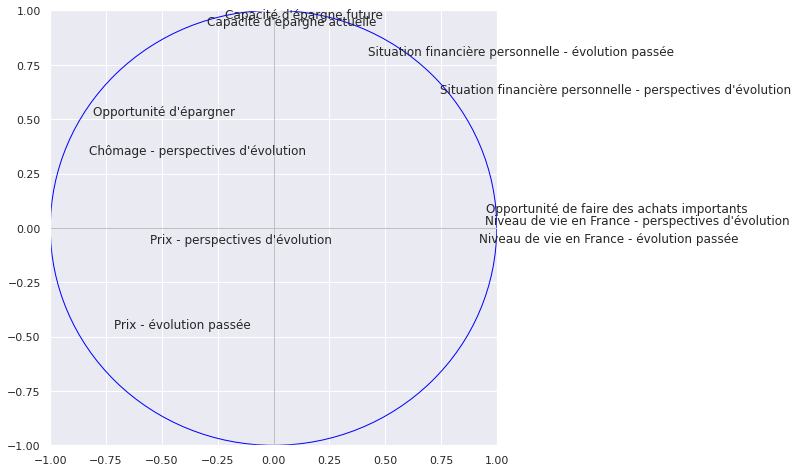

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p): 
  plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1])) #on place chaque facteur en fonction de leur valeur dans les deux premières colonnes de la matrice de covariance. 
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)
#affichage
plt.show()

 "Opportunité de faires des achats importants", "niveau de vie en France - perspective d'évolution" et "Niveau de vie en France - évolutions passées" sont très proches du cercle de corrélation et donc bien représentés sur le mapping. Ils sont de plus très proches de l'axe 1, indiquant qu'ils représentent très bien cet axe. 
Entre ces variables citées et "capacité d'épargne actuelle", "capacité d'épargne future", nous avons presque un angle droit. Les deux types de variable, niveau de vie et capacité d'épargne, semblent donc indépendantes.
Les capacités d'épargnes sont proches de l'axe 2, elles représentent donc très certainement bien cet axe.

# *C. Contribution des facteurs aux axes*

Tout comme notre premier graphique, on calcule alors la qualité des représentations de nos facteurs et leur contribution aux axes. 

In [ ]:
#calcul de la qualité des représentations (comme en I. )
#cosinus carré des variables
cos2var = corvar**2 
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                                                   id    COS2_1    COS2_2
0          Niveau de vie en France - évolution passée  0.843731  0.004361
1   Niveau de vie en France - perspectives d'évolu...  0.898062  0.000245
2                  Chômage - perspectives d'évolution  0.680222  0.114030
3                             Prix - évolution passée  0.509268  0.213101
4                     Prix - perspectives d'évolution  0.308073  0.004718
5          Opportunité de faire des achats importants  0.904415  0.005356
6                              Opportunité d'épargner  0.653925  0.270576
7                         Capacité d'épargne actuelle  0.088541  0.871580
8   Situation financière personnelle - évolution p...  0.179911  0.628890
9   Situation financière personnelle - perspective...  0.556106  0.381539
10                          Capacité d'épargne future  0.047853  0.933698


In [ ]:
#contributions aux axes (comme en I. )
ctrvar = cos2var
for k in range(p):
  ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes, i.e. les deux premières colonnes. 
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                                                   id     CTR_1     CTR_2
0          Niveau de vie en France - évolution passée  0.148803  0.001272
1   Niveau de vie en France - perspectives d'évolu...  0.158385  0.000071
2                  Chômage - perspectives d'évolution  0.119966  0.033263
3                             Prix - évolution passée  0.089816  0.062163
4                     Prix - perspectives d'évolution  0.054333  0.001376
5          Opportunité de faire des achats importants  0.159506  0.001562
6                              Opportunité d'épargner  0.115329  0.078929
7                         Capacité d'épargne actuelle  0.015615  0.254246
8   Situation financière personnelle - évolution p...  0.031730  0.183452
9   Situation financière personnelle - perspective...  0.098077  0.111298
10                          Capacité d'épargne future  0.008440  0.272367


Les niveaux de vie en France (passés et les perspectives)contribuent donc fortement à l'axe 1, ainsi que l'opportunité de faire des achats importants. 
Les capacités d'épargne (actuelle et futures), ainsi que les situaitons finanicères (personnelles et futures), contribuent fortement à l'axe 2. 